<a href="https://colab.research.google.com/github/nipuni1313/CNN-for-image-classification/blob/main/Task_2_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom CNN creation & Evaluation


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Download and unzip the dataset
!wget https://archive.ics.uci.edu/static/public/908/realwaste.zip -O /content/realwaste.zip
!unzip -q /content/realwaste.zip -d /content/dataset

# Define dataset path
dataset_path = '/content/dataset/realwaste-main/RealWaste'

# List all images and their categories
categories = os.listdir(dataset_path)
image_paths = []
labels = []

# Collect all image paths and corresponding labels
for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        image_paths.append(os.path.join(category_path, img_file))
        labels.append(label)

# Convert to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

# Define a function to preprocess all images
from tqdm import tqdm  # Install via pip if not already installed
def preprocess_all_images(image_paths, labels, target_size=(128, 128)):  # Adjusted size for faster processing
    datagen = ImageDataGenerator(rescale=1.0 / 255)
    processed_images = []
    for i, path in tqdm(enumerate(image_paths), total=len(image_paths), desc="Processing Images"):
        img = datagen.flow_from_dataframe(
            dataframe=pd.DataFrame({'filename': [path], 'class': [str(labels[i])]}),
            x_col='filename',
            y_col='class',
            target_size=target_size,
            batch_size=1,
            class_mode=None,
            shuffle=False
        )[0]
        processed_images.append(img[0])  # Extract the processed image array
    return np.array(processed_images), labels

# Preprocess all images
processed_images, processed_labels = preprocess_all_images(image_paths, labels)

# Split preprocessed data into train, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    processed_images, processed_labels, test_size=0.4, random_state=42
)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, random_state=42
)

# Print split results
print(f"Train samples: {len(train_images)}")
print(f"Validation samples: {len(val_images)}")
print(f"Test samples: {len(test_images)}")

# Calculate the number of classes based on unique labels in the training data
num_classes = len(np.unique(train_labels))  # Ensure train_labels is correctly passed here

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Updated input size
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Add BatchNormalization here
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout here as well

# Output Layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


--2024-12-12 09:04:12--  https://archive.ics.uci.edu/static/public/908/realwaste.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/realwaste.zip’

/content/realwaste.     [             <=>    ] 463.09M  13.9MB/s    in 31s     

2024-12-12 09:19:44 (14.8 MB/s) - Read error at byte 485584896 (Connection timed out).Retrying.

--2024-12-12 09:19:45--  (try: 2)  https://archive.ics.uci.edu/static/public/908/realwaste.zip
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/realwaste.zip’

/content/realwaste.     [               <=>  ] 541.37M  17.3MB/s    in 33s     

2024-12-12 09:35:19 (16.3 MB/s) - Read error at byte 567668736 (Connection timed out).Retrying.

--2024

Processing Images:   0%|          | 0/4752 [00:00<?, ?it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   0%|          | 7/4752 [00:00<01:08, 69.44it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   0%|          | 23/4752 [00:00<00:39, 120.94it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   1%|          | 38/4752 [00:00<00:36, 130.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   1%|          | 52/4752 [00:00<00:36, 130.53it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   1%|▏         | 66/4752 [00:00<00:35, 133.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   2%|▏         | 81/4752 [00:00<00:34, 136.12it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   2%|▏         | 96/4752 [00:00<00:33, 139.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   2%|▏         | 112/4752 [00:00<00:31, 145.48it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   3%|▎         | 127/4752 [00:00<00:31, 146.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   3%|▎         | 143/4752 [00:01<00:30, 149.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   3%|▎         | 160/4752 [00:01<00:29, 153.43it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   4%|▎         | 176/4752 [00:01<00:30, 151.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   4%|▍         | 192/4752 [00:01<00:31, 143.49it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   4%|▍         | 207/4752 [00:01<00:32, 141.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   5%|▍         | 222/4752 [00:01<00:32, 140.08it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   5%|▍         | 237/4752 [00:01<00:33, 134.41it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   5%|▌         | 251/4752 [00:01<00:33, 132.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   6%|▌         | 265/4752 [00:01<00:34, 129.78it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   6%|▌         | 279/4752 [00:02<00:34, 128.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   6%|▌         | 292/4752 [00:02<00:34, 128.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   6%|▋         | 306/4752 [00:02<00:33, 130.91it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   7%|▋         | 320/4752 [00:02<00:34, 130.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   7%|▋         | 334/4752 [00:02<00:34, 127.46it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   7%|▋         | 347/4752 [00:02<00:34, 126.98it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   8%|▊         | 360/4752 [00:02<00:34, 126.37it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   8%|▊         | 373/4752 [00:02<00:34, 125.39it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   8%|▊         | 388/4752 [00:02<00:33, 131.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   8%|▊         | 403/4752 [00:02<00:32, 135.71it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   9%|▉         | 418/4752 [00:03<00:31, 138.99it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   9%|▉         | 433/4752 [00:03<00:30, 141.12it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:   9%|▉         | 448/4752 [00:03<00:31, 137.41it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  10%|▉         | 462/4752 [00:03<00:33, 129.47it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  10%|█         | 476/4752 [00:03<00:33, 126.45it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  10%|█         | 489/4752 [00:03<00:33, 125.90it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  11%|█         | 503/4752 [00:03<00:33, 127.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  11%|█         | 516/4752 [00:03<00:34, 123.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  11%|█         | 529/4752 [00:03<00:34, 121.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  11%|█▏        | 542/4752 [00:04<00:34, 122.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  12%|█▏        | 556/4752 [00:04<00:33, 126.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  12%|█▏        | 570/4752 [00:04<00:32, 128.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  12%|█▏        | 585/4752 [00:04<00:31, 132.33it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  13%|█▎        | 600/4752 [00:04<00:30, 135.65it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  13%|█▎        | 616/4752 [00:04<00:29, 140.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  13%|█▎        | 632/4752 [00:04<00:28, 144.58it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  14%|█▎        | 647/4752 [00:04<00:29, 139.42it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  14%|█▍        | 661/4752 [00:04<00:30, 132.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  14%|█▍        | 675/4752 [00:05<00:31, 131.19it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  15%|█▍        | 690/4752 [00:05<00:29, 135.54it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  15%|█▍        | 704/4752 [00:05<00:30, 132.66it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  15%|█▌        | 718/4752 [00:05<00:31, 126.83it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  15%|█▌        | 731/4752 [00:05<00:31, 126.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  16%|█▌        | 746/4752 [00:05<00:30, 130.39it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  16%|█▌        | 760/4752 [00:05<00:31, 128.75it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  16%|█▋        | 773/4752 [00:05<00:32, 123.29it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  17%|█▋        | 786/4752 [00:05<00:34, 115.41it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  17%|█▋        | 798/4752 [00:06<00:34, 113.12it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  17%|█▋        | 810/4752 [00:06<00:34, 112.85it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  17%|█▋        | 822/4752 [00:06<00:35, 110.88it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  18%|█▊        | 834/4752 [00:06<00:34, 112.66it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  18%|█▊        | 847/4752 [00:06<00:33, 116.94it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  18%|█▊        | 860/4752 [00:06<00:32, 118.63it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  18%|█▊        | 872/4752 [00:06<00:35, 108.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  19%|█▊        | 884/4752 [00:06<00:37, 104.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  19%|█▉        | 895/4752 [00:06<00:37, 101.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  19%|█▉        | 906/4752 [00:07<00:38, 98.85it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  19%|█▉        | 916/4752 [00:07<00:38, 98.64it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  20%|█▉        | 929/4752 [00:07<00:36, 104.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  20%|█▉        | 940/4752 [00:07<00:38, 99.56it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  20%|██        | 951/4752 [00:07<00:38, 99.39it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  20%|██        | 961/4752 [00:07<00:38, 99.49it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  20%|██        | 971/4752 [00:07<00:39, 95.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  21%|██        | 983/4752 [00:07<00:37, 100.58it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  21%|██        | 997/4752 [00:07<00:34, 110.18it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  21%|██▏       | 1011/4752 [00:08<00:32, 115.98it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  22%|██▏       | 1024/4752 [00:08<00:31, 117.95it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  22%|██▏       | 1036/4752 [00:08<00:31, 117.57it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  22%|██▏       | 1048/4752 [00:08<00:31, 115.78it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  22%|██▏       | 1060/4752 [00:08<00:31, 115.90it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  23%|██▎       | 1073/4752 [00:08<00:31, 118.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  23%|██▎       | 1085/4752 [00:08<00:31, 117.79it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  23%|██▎       | 1097/4752 [00:08<00:30, 118.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  23%|██▎       | 1110/4752 [00:08<00:30, 119.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  24%|██▎       | 1123/4752 [00:09<00:30, 120.28it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  24%|██▍       | 1136/4752 [00:09<00:30, 118.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  24%|██▍       | 1148/4752 [00:09<00:31, 116.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  24%|██▍       | 1160/4752 [00:09<00:32, 108.87it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  25%|██▍       | 1171/4752 [00:09<00:34, 104.60it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  25%|██▍       | 1182/4752 [00:09<00:33, 105.37it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  25%|██▌       | 1194/4752 [00:09<00:33, 107.76it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  25%|██▌       | 1206/4752 [00:09<00:32, 108.48it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  26%|██▌       | 1217/4752 [00:09<00:34, 103.27it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  26%|██▌       | 1228/4752 [00:10<00:35, 99.07it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  26%|██▌       | 1239/4752 [00:10<00:34, 101.21it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  26%|██▋       | 1250/4752 [00:10<00:33, 103.55it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  27%|██▋       | 1263/4752 [00:10<00:31, 109.47it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  27%|██▋       | 1275/4752 [00:10<00:32, 108.44it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  27%|██▋       | 1286/4752 [00:10<00:32, 106.75it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  27%|██▋       | 1298/4752 [00:10<00:31, 108.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  28%|██▊       | 1310/4752 [00:10<00:31, 109.19it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  28%|██▊       | 1321/4752 [00:10<00:32, 106.95it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  28%|██▊       | 1333/4752 [00:11<00:31, 109.48it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  28%|██▊       | 1346/4752 [00:11<00:29, 113.68it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  29%|██▊       | 1358/4752 [00:11<00:29, 113.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  29%|██▉       | 1371/4752 [00:11<00:28, 118.27it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  29%|██▉       | 1384/4752 [00:11<00:28, 118.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  29%|██▉       | 1396/4752 [00:11<00:29, 113.02it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  30%|██▉       | 1408/4752 [00:11<00:30, 110.45it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  30%|██▉       | 1421/4752 [00:11<00:29, 114.76it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  30%|███       | 1433/4752 [00:11<00:28, 114.56it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  30%|███       | 1445/4752 [00:11<00:28, 115.22it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  31%|███       | 1458/4752 [00:12<00:27, 117.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  31%|███       | 1471/4752 [00:12<00:27, 120.90it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  31%|███▏      | 1485/4752 [00:12<00:26, 124.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  32%|███▏      | 1498/4752 [00:12<00:26, 121.81it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  32%|███▏      | 1511/4752 [00:12<00:26, 122.92it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  32%|███▏      | 1524/4752 [00:12<00:26, 122.64it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  32%|███▏      | 1537/4752 [00:12<00:26, 121.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  33%|███▎      | 1550/4752 [00:12<00:26, 120.54it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  33%|███▎      | 1563/4752 [00:12<00:26, 120.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  33%|███▎      | 1576/4752 [00:13<00:26, 120.09it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  33%|███▎      | 1589/4752 [00:13<00:26, 117.70it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  34%|███▎      | 1602/4752 [00:13<00:26, 118.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  34%|███▍      | 1614/4752 [00:13<00:26, 118.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  34%|███▍      | 1627/4752 [00:13<00:25, 121.25it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  35%|███▍      | 1640/4752 [00:13<00:26, 116.12it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  35%|███▍      | 1653/4752 [00:13<00:25, 119.24it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  35%|███▌      | 1665/4752 [00:13<00:25, 119.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  35%|███▌      | 1678/4752 [00:13<00:25, 120.28it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  36%|███▌      | 1693/4752 [00:14<00:24, 126.03it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  36%|███▌      | 1706/4752 [00:14<00:23, 127.16it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  36%|███▌      | 1720/4752 [00:14<00:23, 130.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  37%|███▋      | 1735/4752 [00:14<00:22, 134.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  37%|███▋      | 1749/4752 [00:14<00:22, 132.85it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  37%|███▋      | 1763/4752 [00:14<00:22, 134.17it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  37%|███▋      | 1777/4752 [00:14<00:22, 132.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  38%|███▊      | 1792/4752 [00:14<00:21, 134.85it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  38%|███▊      | 1806/4752 [00:14<00:22, 133.58it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  38%|███▊      | 1820/4752 [00:14<00:21, 134.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  39%|███▊      | 1834/4752 [00:15<00:22, 130.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  39%|███▉      | 1848/4752 [00:15<00:23, 125.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  39%|███▉      | 1861/4752 [00:15<00:23, 122.44it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  39%|███▉      | 1874/4752 [00:15<00:23, 120.41it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  40%|███▉      | 1887/4752 [00:15<00:23, 120.44it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  40%|███▉      | 1900/4752 [00:15<00:23, 122.36it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  40%|████      | 1913/4752 [00:15<00:23, 120.17it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  41%|████      | 1926/4752 [00:15<00:23, 120.00it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  41%|████      | 1939/4752 [00:15<00:23, 120.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  41%|████      | 1952/4752 [00:16<00:24, 115.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  41%|████▏     | 1964/4752 [00:16<00:23, 116.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  42%|████▏     | 1977/4752 [00:16<00:23, 118.55it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  42%|████▏     | 1989/4752 [00:16<00:23, 116.66it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  42%|████▏     | 2001/4752 [00:16<00:23, 116.63it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  42%|████▏     | 2013/4752 [00:16<00:23, 115.62it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  43%|████▎     | 2025/4752 [00:16<00:24, 111.70it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  43%|████▎     | 2037/4752 [00:16<00:24, 112.08it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  43%|████▎     | 2049/4752 [00:16<00:24, 112.11it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  43%|████▎     | 2062/4752 [00:17<00:23, 115.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  44%|████▎     | 2075/4752 [00:17<00:22, 118.47it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  44%|████▍     | 2089/4752 [00:17<00:21, 123.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  44%|████▍     | 2103/4752 [00:17<00:20, 126.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  45%|████▍     | 2116/4752 [00:17<00:20, 127.40it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  45%|████▍     | 2130/4752 [00:17<00:20, 129.79it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  45%|████▌     | 2144/4752 [00:17<00:19, 130.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  45%|████▌     | 2158/4752 [00:17<00:20, 129.25it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  46%|████▌     | 2171/4752 [00:17<00:20, 128.72it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  46%|████▌     | 2186/4752 [00:17<00:19, 132.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  46%|████▋     | 2200/4752 [00:18<00:20, 124.22it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  47%|████▋     | 2213/4752 [00:18<00:20, 123.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  47%|████▋     | 2227/4752 [00:18<00:20, 124.95it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  47%|████▋     | 2240/4752 [00:18<00:20, 124.50it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  47%|████▋     | 2253/4752 [00:18<00:20, 124.80it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  48%|████▊     | 2266/4752 [00:18<00:19, 125.40it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  48%|████▊     | 2279/4752 [00:18<00:21, 115.37it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  48%|████▊     | 2291/4752 [00:18<00:21, 113.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  48%|████▊     | 2304/4752 [00:18<00:21, 115.33it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  49%|████▊     | 2316/4752 [00:19<00:21, 111.83it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  49%|████▉     | 2328/4752 [00:19<00:21, 110.98it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  49%|████▉     | 2341/4752 [00:19<00:20, 114.99it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  50%|████▉     | 2354/4752 [00:19<00:20, 117.40it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  50%|████▉     | 2367/4752 [00:19<00:20, 119.08it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  50%|█████     | 2381/4752 [00:19<00:19, 122.49it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  50%|█████     | 2394/4752 [00:19<00:19, 123.79it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  51%|█████     | 2409/4752 [00:19<00:18, 128.83it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  51%|█████     | 2422/4752 [00:19<00:18, 125.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  51%|█████     | 2435/4752 [00:20<00:18, 122.72it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  52%|█████▏    | 2448/4752 [00:20<00:19, 119.31it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  52%|█████▏    | 2460/4752 [00:20<00:19, 117.70it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  52%|█████▏    | 2472/4752 [00:20<00:19, 117.23it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  52%|█████▏    | 2485/4752 [00:20<00:19, 118.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  53%|█████▎    | 2498/4752 [00:20<00:18, 118.92it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  53%|█████▎    | 2510/4752 [00:20<00:19, 115.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  53%|█████▎    | 2522/4752 [00:20<00:19, 116.24it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  53%|█████▎    | 2534/4752 [00:20<00:19, 115.78it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  54%|█████▎    | 2546/4752 [00:21<00:19, 113.09it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  54%|█████▍    | 2558/4752 [00:21<00:19, 112.19it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  54%|█████▍    | 2570/4752 [00:21<00:19, 110.26it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  54%|█████▍    | 2583/4752 [00:21<00:19, 113.83it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  55%|█████▍    | 2597/4752 [00:21<00:17, 119.76it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  55%|█████▍    | 2611/4752 [00:21<00:17, 124.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  55%|█████▌    | 2625/4752 [00:21<00:16, 126.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  56%|█████▌    | 2638/4752 [00:21<00:17, 120.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  56%|█████▌    | 2651/4752 [00:21<00:17, 120.21it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  56%|█████▌    | 2664/4752 [00:22<00:17, 116.66it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  56%|█████▋    | 2676/4752 [00:22<00:19, 108.85it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  57%|█████▋    | 2687/4752 [00:22<00:20, 102.70it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  57%|█████▋    | 2698/4752 [00:22<00:20, 98.69it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  57%|█████▋    | 2708/4752 [00:22<00:21, 95.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  57%|█████▋    | 2718/4752 [00:22<00:21, 94.24it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  57%|█████▋    | 2728/4752 [00:22<00:21, 94.34it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  58%|█████▊    | 2738/4752 [00:22<00:21, 92.92it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  58%|█████▊    | 2748/4752 [00:22<00:21, 93.31it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  58%|█████▊    | 2759/4752 [00:23<00:20, 97.48it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  58%|█████▊    | 2771/4752 [00:23<00:19, 103.15it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  59%|█████▊    | 2782/4752 [00:23<00:19, 102.25it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  59%|█████▉    | 2795/4752 [00:23<00:17, 109.46it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  59%|█████▉    | 2809/4752 [00:23<00:16, 115.96it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  59%|█████▉    | 2821/4752 [00:23<00:17, 111.54it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  60%|█████▉    | 2834/4752 [00:23<00:16, 116.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  60%|█████▉    | 2847/4752 [00:23<00:15, 119.36it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  60%|██████    | 2861/4752 [00:23<00:15, 123.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  61%|██████    | 2875/4752 [00:23<00:14, 127.34it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  61%|██████    | 2888/4752 [00:24<00:16, 116.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  61%|██████    | 2900/4752 [00:24<00:17, 106.95it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  61%|██████▏   | 2911/4752 [00:24<00:18, 101.63it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  61%|██████▏   | 2922/4752 [00:24<00:18, 97.62it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  62%|██████▏   | 2932/4752 [00:24<00:19, 93.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  62%|██████▏   | 2942/4752 [00:24<00:20, 89.58it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  62%|██████▏   | 2952/4752 [00:24<00:19, 91.45it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  62%|██████▏   | 2962/4752 [00:24<00:19, 90.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  63%|██████▎   | 2973/4752 [00:25<00:18, 94.17it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  63%|██████▎   | 2984/4752 [00:25<00:18, 98.17it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  63%|██████▎   | 2995/4752 [00:25<00:17, 100.90it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  63%|██████▎   | 3006/4752 [00:25<00:17, 101.19it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  64%|██████▎   | 3019/4752 [00:25<00:15, 108.94it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  64%|██████▍   | 3032/4752 [00:25<00:15, 112.06it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  64%|██████▍   | 3044/4752 [00:25<00:14, 113.93it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  64%|██████▍   | 3057/4752 [00:25<00:14, 116.91it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  65%|██████▍   | 3070/4752 [00:25<00:14, 119.19it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  65%|██████▍   | 3084/4752 [00:26<00:13, 121.11it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  65%|██████▌   | 3097/4752 [00:26<00:15, 108.78it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  65%|██████▌   | 3109/4752 [00:26<00:16, 102.16it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  66%|██████▌   | 3120/4752 [00:26<00:17, 95.09it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  66%|██████▌   | 3130/4752 [00:26<00:17, 92.57it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  66%|██████▌   | 3141/4752 [00:26<00:16, 95.10it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  66%|██████▋   | 3153/4752 [00:26<00:15, 100.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  67%|██████▋   | 3165/4752 [00:26<00:15, 104.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  67%|██████▋   | 3177/4752 [00:26<00:14, 106.57it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  67%|██████▋   | 3189/4752 [00:27<00:14, 109.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  67%|██████▋   | 3201/4752 [00:27<00:14, 107.36it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  68%|██████▊   | 3214/4752 [00:27<00:13, 112.65it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  68%|██████▊   | 3227/4752 [00:27<00:13, 116.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  68%|██████▊   | 3239/4752 [00:27<00:13, 115.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  68%|██████▊   | 3251/4752 [00:27<00:12, 115.64it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  69%|██████▊   | 3264/4752 [00:27<00:12, 117.47it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  69%|██████▉   | 3277/4752 [00:27<00:12, 120.76it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  69%|██████▉   | 3290/4752 [00:27<00:11, 123.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  70%|██████▉   | 3303/4752 [00:28<00:12, 119.72it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  70%|██████▉   | 3316/4752 [00:28<00:12, 116.37it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  70%|███████   | 3328/4752 [00:28<00:12, 111.07it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  70%|███████   | 3340/4752 [00:28<00:13, 105.30it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  71%|███████   | 3351/4752 [00:28<00:13, 106.02it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  71%|███████   | 3362/4752 [00:28<00:13, 100.56it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  71%|███████   | 3374/4752 [00:28<00:13, 104.02it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  71%|███████   | 3385/4752 [00:28<00:13, 103.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  71%|███████▏  | 3396/4752 [00:28<00:12, 104.88it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  72%|███████▏  | 3407/4752 [00:29<00:13, 100.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  72%|███████▏  | 3418/4752 [00:29<00:13, 97.45it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  72%|███████▏  | 3429/4752 [00:29<00:13, 98.66it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  72%|███████▏  | 3440/4752 [00:29<00:12, 101.30it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  73%|███████▎  | 3451/4752 [00:29<00:12, 103.37it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  73%|███████▎  | 3462/4752 [00:29<00:12, 102.23it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  73%|███████▎  | 3473/4752 [00:29<00:12, 99.12it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  73%|███████▎  | 3486/4752 [00:29<00:11, 106.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  74%|███████▎  | 3500/4752 [00:29<00:11, 113.60it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  74%|███████▍  | 3512/4752 [00:30<00:11, 110.69it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  74%|███████▍  | 3524/4752 [00:30<00:11, 104.11it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  74%|███████▍  | 3535/4752 [00:30<00:12, 97.10it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  75%|███████▍  | 3545/4752 [00:30<00:12, 96.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  75%|███████▍  | 3557/4752 [00:30<00:11, 100.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  75%|███████▌  | 3569/4752 [00:30<00:11, 104.95it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  75%|███████▌  | 3581/4752 [00:30<00:10, 108.62it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  76%|███████▌  | 3593/4752 [00:30<00:10, 111.81it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  76%|███████▌  | 3606/4752 [00:30<00:09, 115.55it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  76%|███████▌  | 3618/4752 [00:31<00:09, 114.08it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  76%|███████▋  | 3630/4752 [00:31<00:10, 112.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  77%|███████▋  | 3642/4752 [00:31<00:09, 111.84it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  77%|███████▋  | 3654/4752 [00:31<00:09, 111.56it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  77%|███████▋  | 3666/4752 [00:31<00:10, 105.18it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  77%|███████▋  | 3677/4752 [00:31<00:10, 103.28it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  78%|███████▊  | 3689/4752 [00:31<00:09, 107.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  78%|███████▊  | 3701/4752 [00:31<00:09, 110.50it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  78%|███████▊  | 3714/4752 [00:31<00:09, 114.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  78%|███████▊  | 3727/4752 [00:32<00:08, 115.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  79%|███████▊  | 3739/4752 [00:32<00:09, 109.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  79%|███████▉  | 3751/4752 [00:32<00:09, 110.20it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  79%|███████▉  | 3763/4752 [00:32<00:08, 112.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  79%|███████▉  | 3776/4752 [00:32<00:08, 115.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  80%|███████▉  | 3790/4752 [00:32<00:07, 120.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  80%|████████  | 3803/4752 [00:32<00:07, 123.03it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  80%|████████  | 3817/4752 [00:32<00:07, 125.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  81%|████████  | 3830/4752 [00:32<00:07, 119.42it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  81%|████████  | 3844/4752 [00:33<00:07, 123.72it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  81%|████████  | 3857/4752 [00:33<00:07, 123.34it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  81%|████████▏ | 3870/4752 [00:33<00:07, 124.94it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  82%|████████▏ | 3884/4752 [00:33<00:06, 127.09it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  82%|████████▏ | 3897/4752 [00:33<00:07, 118.86it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  82%|████████▏ | 3909/4752 [00:33<00:07, 107.34it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  82%|████████▏ | 3920/4752 [00:33<00:07, 107.70it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  83%|████████▎ | 3931/4752 [00:33<00:07, 108.28it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  83%|████████▎ | 3942/4752 [00:33<00:07, 105.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  83%|████████▎ | 3953/4752 [00:34<00:07, 106.20it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  83%|████████▎ | 3964/4752 [00:34<00:07, 105.62it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  84%|████████▎ | 3975/4752 [00:34<00:07, 105.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  84%|████████▍ | 3986/4752 [00:34<00:07, 98.39it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  84%|████████▍ | 3997/4752 [00:34<00:07, 99.44it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  84%|████████▍ | 4009/4752 [00:34<00:07, 103.13it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  85%|████████▍ | 4020/4752 [00:34<00:07, 103.53it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  85%|████████▍ | 4031/4752 [00:34<00:06, 104.49it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  85%|████████▌ | 4043/4752 [00:34<00:06, 108.58it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  85%|████████▌ | 4054/4752 [00:34<00:06, 105.98it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  86%|████████▌ | 4066/4752 [00:35<00:06, 108.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  86%|████████▌ | 4077/4752 [00:35<00:06, 106.21it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  86%|████████▌ | 4088/4752 [00:35<00:06, 103.32it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  86%|████████▋ | 4099/4752 [00:35<00:06, 103.54it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  86%|████████▋ | 4110/4752 [00:35<00:06, 105.20it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  87%|████████▋ | 4121/4752 [00:35<00:05, 105.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  87%|████████▋ | 4133/4752 [00:35<00:05, 107.08it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  87%|████████▋ | 4145/4752 [00:35<00:05, 108.93it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  87%|████████▋ | 4156/4752 [00:35<00:05, 106.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  88%|████████▊ | 4167/4752 [00:36<00:05, 100.22it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  88%|████████▊ | 4178/4752 [00:36<00:05, 98.52it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  88%|████████▊ | 4188/4752 [00:36<00:05, 96.59it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  88%|████████▊ | 4198/4752 [00:36<00:05, 96.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  89%|████████▊ | 4209/4752 [00:36<00:05, 97.79it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  89%|████████▉ | 4220/4752 [00:36<00:05, 100.30it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  89%|████████▉ | 4232/4752 [00:36<00:05, 104.00it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  89%|████████▉ | 4243/4752 [00:36<00:04, 104.53it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  90%|████████▉ | 4254/4752 [00:36<00:04, 100.62it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  90%|████████▉ | 4265/4752 [00:37<00:05, 96.89it/s] 

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  90%|████████▉ | 4276/4752 [00:37<00:04, 98.15it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  90%|█████████ | 4287/4752 [00:37<00:04, 101.23it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  90%|█████████ | 4298/4752 [00:37<00:04, 103.43it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  91%|█████████ | 4309/4752 [00:37<00:04, 103.05it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  91%|█████████ | 4320/4752 [00:37<00:04, 104.74it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  91%|█████████ | 4331/4752 [00:37<00:04, 104.45it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  91%|█████████▏| 4343/4752 [00:37<00:03, 108.64it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  92%|█████████▏| 4356/4752 [00:37<00:03, 113.38it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  92%|█████████▏| 4369/4752 [00:38<00:03, 116.51it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  92%|█████████▏| 4382/4752 [00:38<00:03, 119.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  92%|█████████▏| 4394/4752 [00:38<00:03, 118.35it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  93%|█████████▎| 4406/4752 [00:38<00:02, 116.61it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  93%|█████████▎| 4418/4752 [00:38<00:02, 114.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  93%|█████████▎| 4431/4752 [00:38<00:02, 116.85it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  94%|█████████▎| 4445/4752 [00:38<00:02, 121.39it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  94%|█████████▍| 4459/4752 [00:38<00:02, 126.04it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  94%|█████████▍| 4474/4752 [00:38<00:02, 130.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  94%|█████████▍| 4489/4752 [00:38<00:01, 133.97it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  95%|█████████▍| 4503/4752 [00:39<00:01, 131.87it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  95%|█████████▌| 4517/4752 [00:39<00:01, 129.27it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  95%|█████████▌| 4530/4752 [00:39<00:01, 129.26it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  96%|█████████▌| 4544/4752 [00:39<00:01, 131.76it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  96%|█████████▌| 4558/4752 [00:39<00:01, 126.49it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  96%|█████████▌| 4571/4752 [00:39<00:01, 126.46it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  96%|█████████▋| 4584/4752 [00:39<00:01, 123.62it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  97%|█████████▋| 4599/4752 [00:39<00:01, 129.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  97%|█████████▋| 4612/4752 [00:39<00:01, 129.01it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  97%|█████████▋| 4625/4752 [00:40<00:01, 124.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  98%|█████████▊| 4640/4752 [00:40<00:00, 130.14it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  98%|█████████▊| 4654/4752 [00:40<00:00, 131.67it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  98%|█████████▊| 4668/4752 [00:40<00:00, 126.73it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  99%|█████████▊| 4681/4752 [00:40<00:00, 125.11it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  99%|█████████▉| 4695/4752 [00:40<00:00, 127.52it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  99%|█████████▉| 4708/4752 [00:40<00:00, 123.77it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images:  99%|█████████▉| 4721/4752 [00:40<00:00, 121.55it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images: 100%|█████████▉| 4734/4752 [00:40<00:00, 119.29it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images: 100%|█████████▉| 4746/4752 [00:41<00:00, 112.98it/s]

Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.
Found 1 validated image filenames.


Processing Images: 100%|██████████| 4752/4752 [00:41<00:00, 115.68it/s]


Train samples: 2851
Validation samples: 950
Test samples: 951


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,571,273 (5.99 MB)

 Trainable params: 1,570,313 (5.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.2853 - loss: 2.4274 - val_accuracy: 0.0863 - val_loss: 5.5273
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.4834 - loss: 1.4579 - val_accuracy: 0.0863 - val_loss: 8.4169
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.5630 - loss: 1.2304 - val_accuracy: 0.0863 - val_loss: 7.0135
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.6483 - loss: 0.9980 - val_accuracy: 0.1032 - val_loss: 6.4528
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6738 - loss: 0.8676 - val_accuracy: 0.2505 - val_loss: 3.3978
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7391 - loss: 0.7155 - val_accuracy: 0.4116 - val_loss: 1.9235
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.7935 - loss: 0.6003 - val_accuracy: 0.5495 - val_loss: 1.3176
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7944 - loss: 0.6102 - val_accuracy: 0.6221 - v

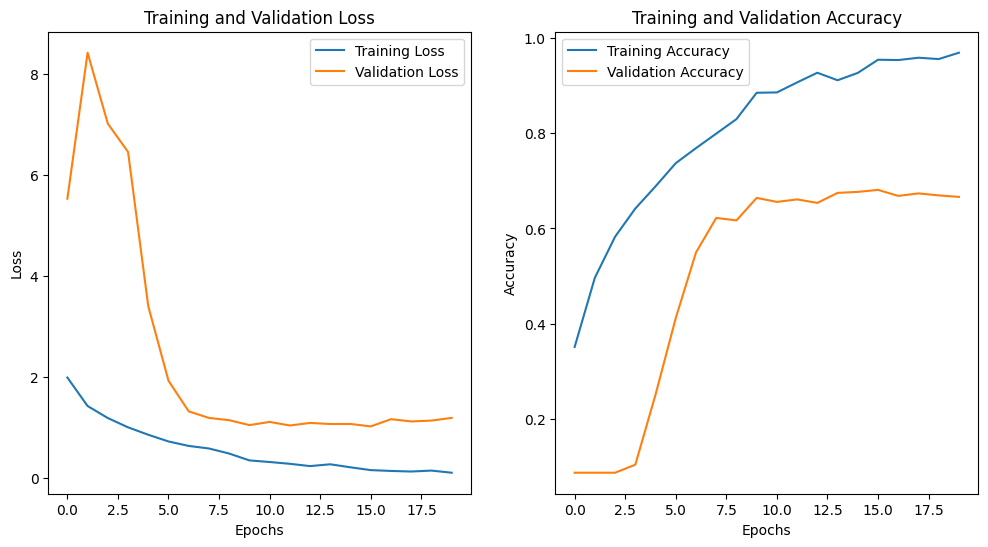

In [ ]:
# Train the model
history = model.fit(
    x=train_images,
    y=train_labels,
    batch_size=32,
    epochs=20,
    validation_data=(val_images, val_labels)
)

# Plot training & validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Training model with learning rate: 0.0001
Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.2707 - loss: 2.5375 - val_accuracy: 0.0905 - val_loss: 4.5997
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4776 - loss: 1.4613 - val_accuracy: 0.0905 - val_loss: 7.0906
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5632 - loss: 1.2509 - val_accuracy: 0.0905 - val_loss: 8.6685
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6426 - loss: 1.0156 - val_accuracy: 0.1168 - val_loss: 5.9815
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6758 - loss: 0.8742 - val_accuracy: 0.2716 - val_loss: 3.3141
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7247 - loss: 0.7856 - val_accuracy: 0.4126 - val_loss: 1.8835
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7675 - loss: 0.6492 - val_accuracy: 0.6095 - val_loss: 1.1515
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.786

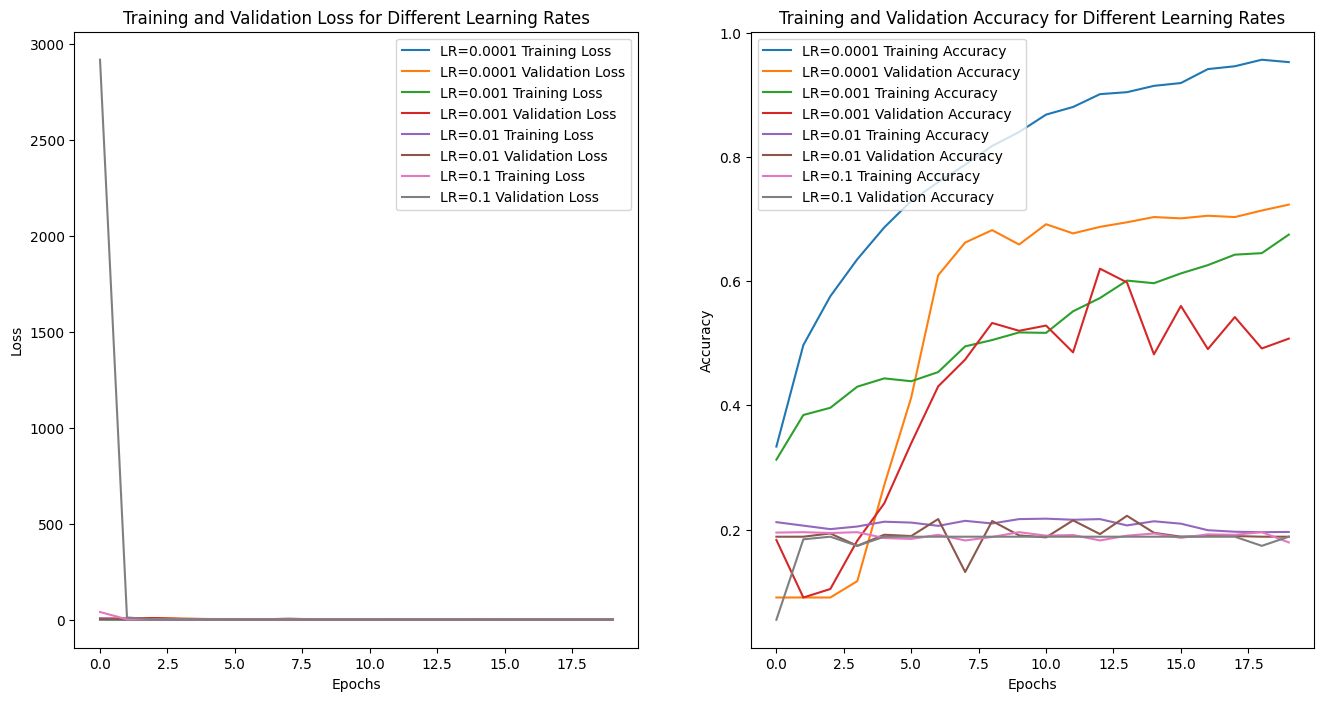

In [ ]:

# Function to create the model
def create_model(learning_rate):
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))  # Updated input size
    model.add(BatchNormalization())  # Add BatchNormalization here
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())  # Add BatchNormalization here
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())  # Add BatchNormalization here
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())  # Add BatchNormalization here
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Increase dropout here as well

    # Output Layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with Adam optimizer and sparse categorical crossentropy loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# List of different learning rates to experiment with
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Store histories of each model for plotting later
histories = []

# Train the model with different learning rates
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    model = create_model(lr)

    # Train the model for 20 epochs without early stopping
    history = model.fit(
        x=train_images,
        y=train_labels,
        batch_size=32,
        epochs=20,  # Train for a fixed 20 epochs
        validation_data=(val_images, val_labels),
        verbose=1
    )

    histories.append(history)

# Plot training & validation loss and accuracy for all models
plt.figure(figsize=(16, 8))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['loss'], label=f'LR={lr} Training Loss')
    plt.plot(histories[i].history['val_loss'], label=f'LR={lr} Validation Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['accuracy'], label=f'LR={lr} Training Accuracy')
    plt.plot(histories[i].history['val_accuracy'], label=f'LR={lr} Validation Accuracy')
plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


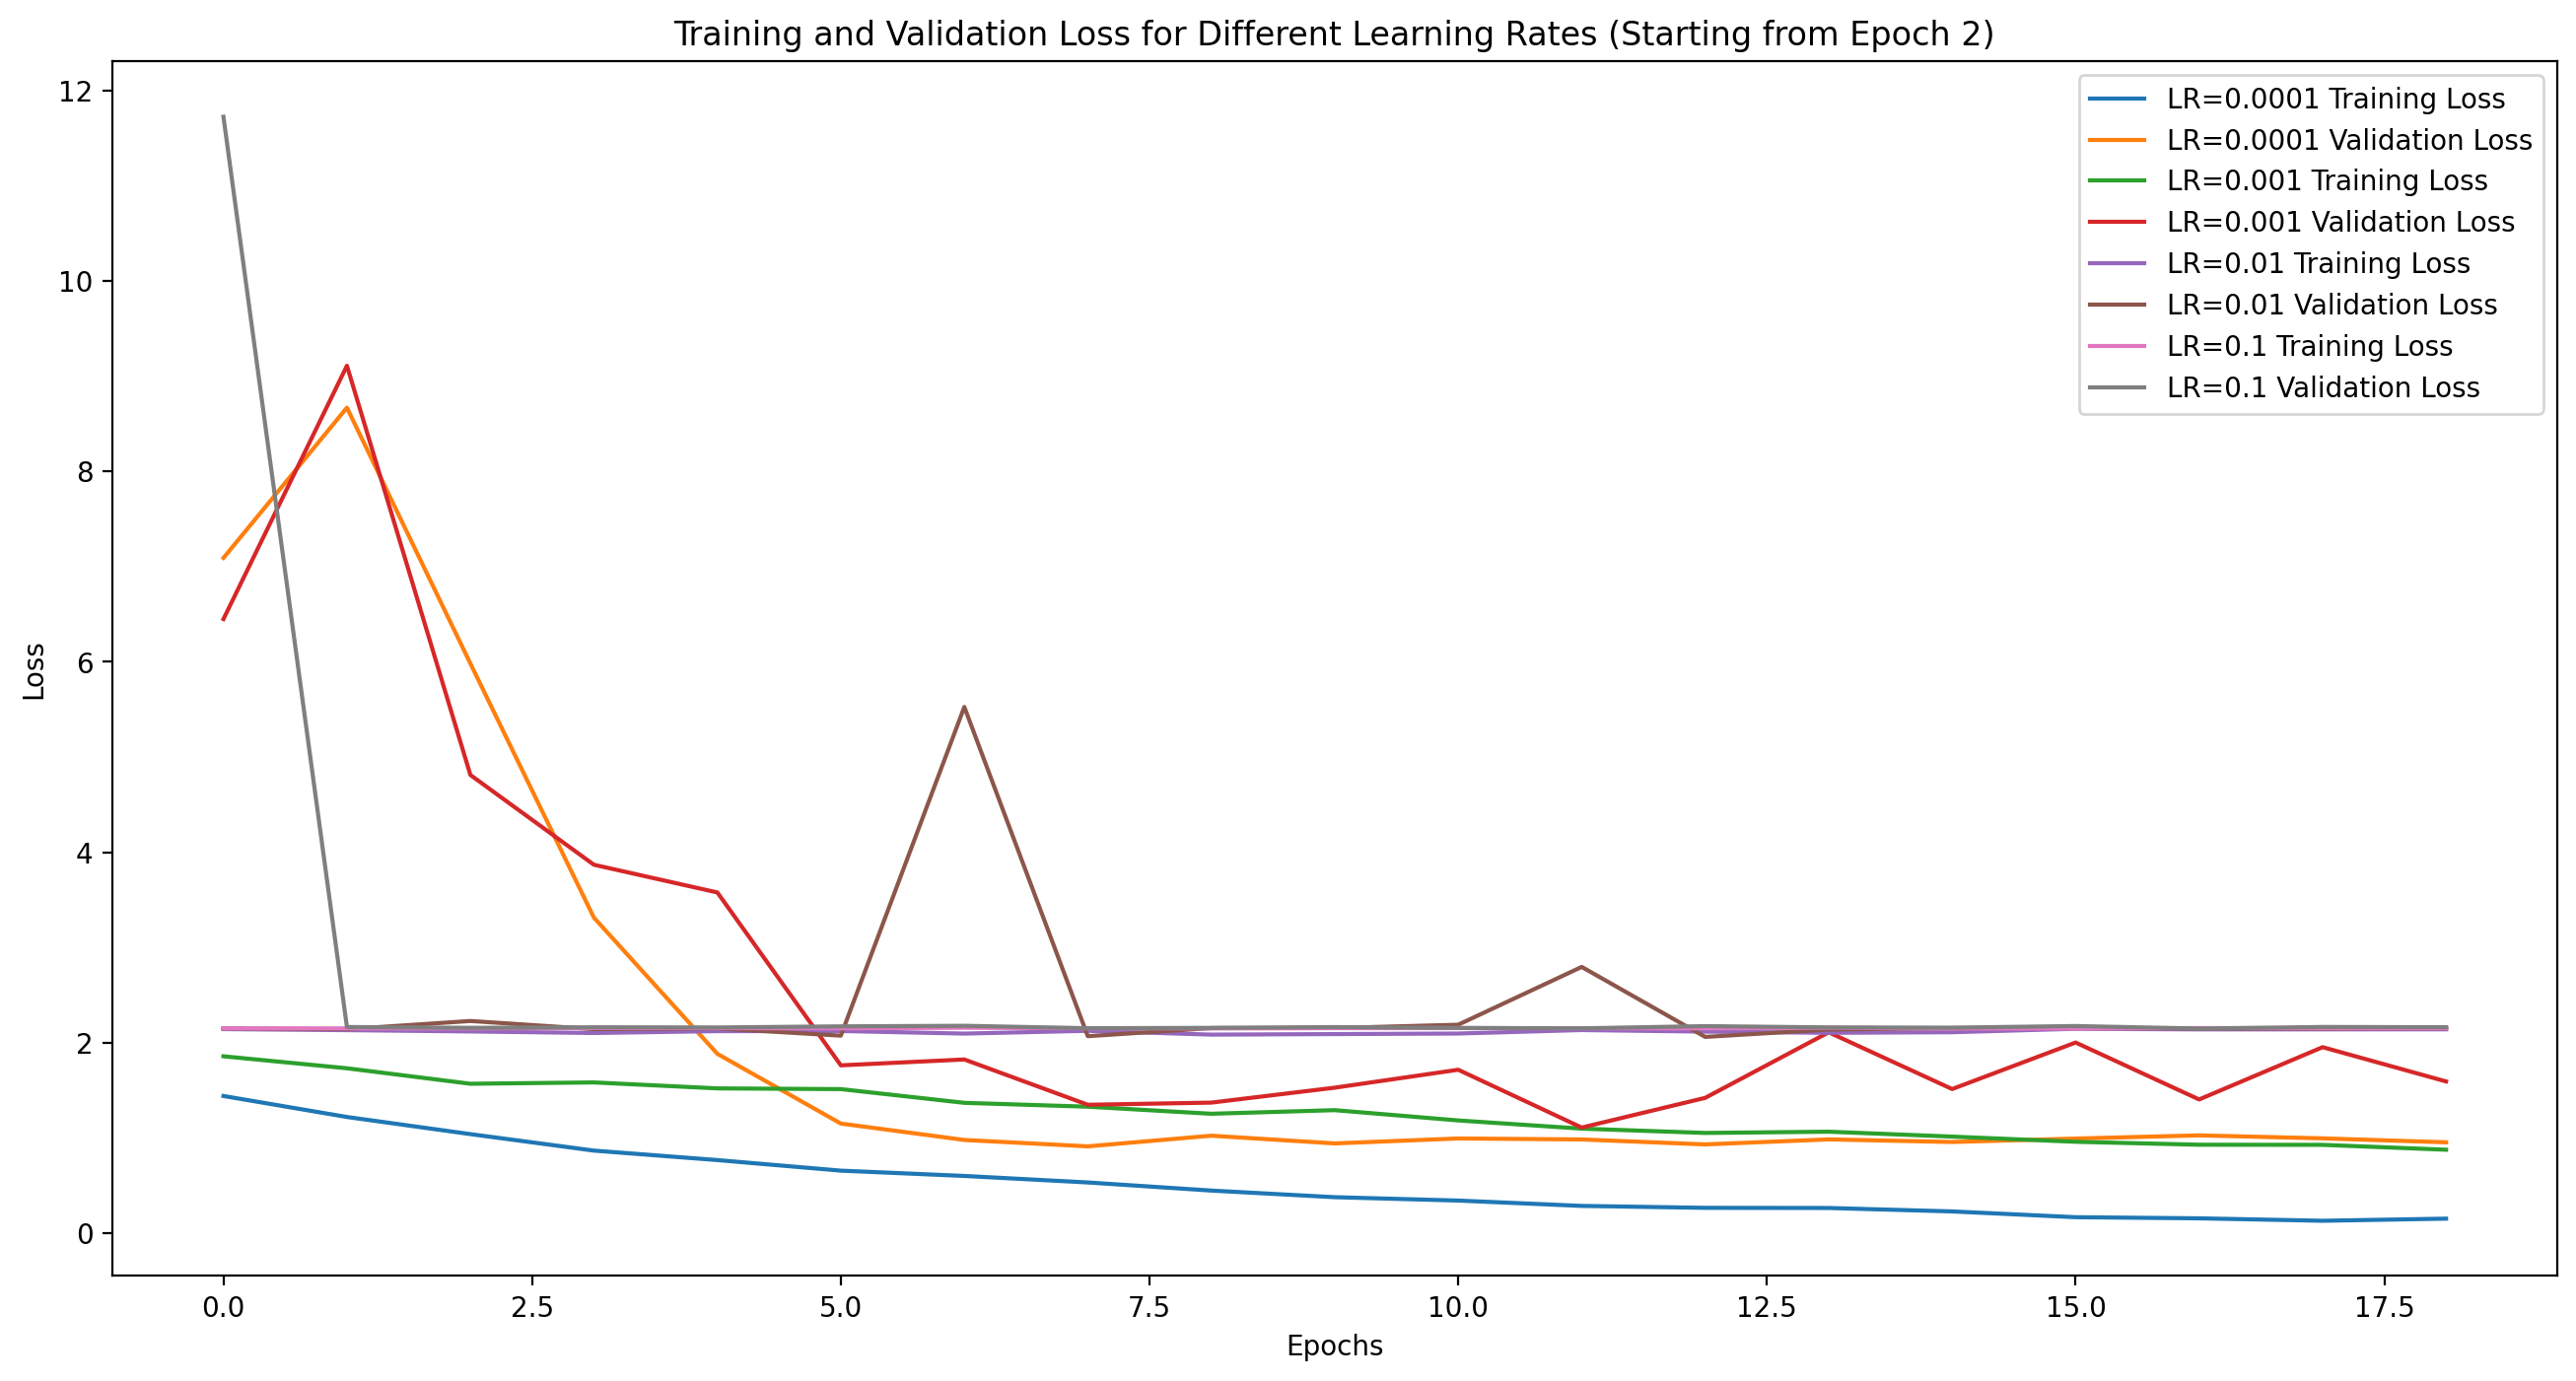

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss with higher resolution and starting from epoch 2
plt.figure(figsize=(16, 8), dpi=200)  # Increase the DPI for higher resolution

# Plot Training and Validation Loss starting from epoch 2
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['loss'][1:], label=f'LR={lr} Training Loss')  # Skip the first epoch
    plt.plot(histories[i].history['val_loss'][1:], label=f'LR={lr} Validation Loss')  # Skip the first epoch

plt.title('Training and Validation Loss for Different Learning Rates (Starting from Epoch 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the figure with a higher DPI
plt.savefig('loss_graph_from_epoch_2_high_resolution.png', dpi=200)  # Save the plot with higher resolution
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.2741 - loss: 2.5679 - val_accuracy: 0.0905 - val_loss: 4.9411
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4899 - loss: 1.4725 - val_accuracy: 0.0905 - val_loss: 7.4028
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5733 - loss: 1.2236 - val_accuracy: 0.0905 - val_loss: 8.5486
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6183 - loss: 1.0936 - val_accuracy: 0.1084 - val_loss: 6.2968
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6809 - loss: 0.9248 - val_accuracy: 0.2274 - val_loss: 3.5285
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7074 - loss: 0.8194 - val_accuracy: 0.4684 - val_loss: 1.5888
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7440 - loss: 0.7354 - val_accuracy: 0.5779 - val_loss: 1.2065
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7706 - loss: 0.6437 - val_accuracy: 0.6653 - 

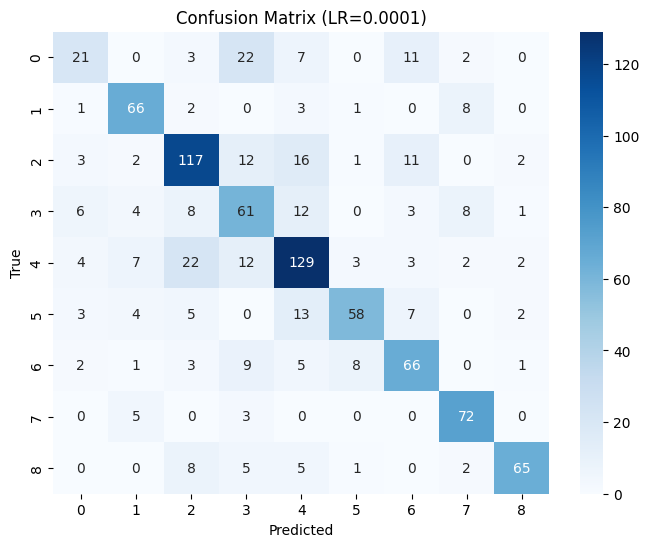

Precision: 0.6925
Recall: 0.6887
F1-Score: 0.6861

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.32      0.40        66
           1       0.74      0.81      0.78        81
           2       0.70      0.71      0.70       164
           3       0.49      0.59      0.54       103
           4       0.68      0.70      0.69       184
           5       0.81      0.63      0.71        92
           6       0.65      0.69      0.67        95
           7       0.77      0.90      0.83        80
           8       0.89      0.76      0.82        86

    accuracy                           0.69       951
   macro avg       0.69      0.68      0.68       951
weighted avg       0.69      0.69      0.69       951



In [ ]:
# Train the model with learning rate 0.0001
learning_rate = 0.0001
model = create_model(learning_rate)

# Train the model
history = model.fit(
    x=train_images,
    y=train_labels,
    batch_size=32,
    epochs=20,  # Train for a fixed 20 epochs
    validation_data=(val_images, val_labels),
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Model with learning rate {learning_rate}:")
print(f"Test Loss = {test_loss:.4f}")
print(f"Test Accuracy = {test_accuracy:.4f}")

# Predictions for the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Generate and plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LR=0.0001)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision, Recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_classes))
